In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split

In [2]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Drop rows with missing values to simplify the example
df.dropna(subset=['age', 'embarked', 'deck'], inplace=True)

# Convert categorical data to numerical data for simplicity
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].astype('category').cat.codes
df['deck'] = df['deck'].astype('category').cat.codes

# Select a subset of columns to focus on
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'deck']]

In [3]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=40)

In [4]:
label_column = 'survived'  # Adjust this to your specific dataset and label column name

In [5]:
labels = train_df[label_column]  # Extract labels by column name
features = train_df.drop(columns=[label_column])  # Features are the rest of the DataFrame

In [6]:
def calculate_gini(labels):
    if len(labels) == 0:
        return 0  # Avoid division by zero for empty label sets
    unique_classes, counts = np.unique(labels, return_counts=True)
    impurity = 1.0
    for count in counts:
        prob_of_lbl = count / float(len(labels))
        impurity -= prob_of_lbl**2
    return impurity

In [7]:
def best_split(df, label_column):
    features = df.drop(columns=[label_column])
    best_gini = 1  # Start with the worst case Gini
    best_feature = None
    best_value = None

    for feature in features.columns:
        unique_values = np.unique(features[feature])
        for value in unique_values:
            left_mask = features[feature] == value
            right_mask = ~left_mask
            left_labels = df[label_column][left_mask]
            right_labels = df[label_column][right_mask]
            left_gini = calculate_gini(left_labels)
            right_gini = calculate_gini(right_labels)
            total_gini = (len(left_labels) / len(df)) * left_gini + \
                         (len(right_labels) / len(df)) * right_gini

            print(f"Split on {feature}={value}")
            print(f"  Left Gini: {left_gini:.4f}")
            print(f"  Right Gini: {right_gini:.4f}")
            print(f"  Total Gini: {total_gini:.4f}")

            if total_gini < best_gini:
                best_gini = total_gini
                best_feature = feature
                best_value = value
                print(f"  ** New best split found on {feature}='{value}' with Gini {best_gini:.4f}")

    # If no split was found that improves Gini, return a fallback case
    # Ensure it always returns three values
    if best_feature is None or best_value is None:
        return None, None, 1  # Return a default Gini of 1 for no split found
    return best_feature, best_value, best_gini

In [8]:
# Test the function for the initial split
best_feature, best_value, _ = best_split(df, label_column)
print(f"\nBest split chosen on feature '{best_feature}' with value '{best_value}'")

Split on pclass=1
  Left Gini: 0.4386
  Right Gini: 0.4352
  Total Gini: 0.4382
  ** New best split found on pclass='1' with Gini 0.4382
Split on pclass=2
  Left Gini: 0.3200
  Right Gini: 0.4458
  Total Gini: 0.4354
  ** New best split found on pclass='2' with Gini 0.4354
Split on pclass=3
  Left Gini: 0.5000
  Right Gini: 0.4308
  Total Gini: 0.4346
  ** New best split found on pclass='3' with Gini 0.4346
Split on sex=0
  Left Gini: 0.4919
  Right Gini: 0.1271
  Total Gini: 0.3155
  ** New best split found on sex='0' with Gini 0.3155
Split on sex=1
  Left Gini: 0.1271
  Right Gini: 0.4919
  Total Gini: 0.3155
Split on age=0.92
  Left Gini: 0.0000
  Right Gini: 0.4394
  Total Gini: 0.4370
Split on age=1.0
  Left Gini: 0.0000
  Right Gini: 0.4394
  Total Gini: 0.4370
Split on age=2.0
  Left Gini: 0.4444
  Right Gini: 0.4341
  Total Gini: 0.4342
Split on age=3.0
  Left Gini: 0.0000
  Right Gini: 0.4394
  Total Gini: 0.4370
Split on age=4.0
  Left Gini: 0.0000
  Right Gini: 0.4419
  Tota

In [9]:
# Creating subsets based on the best split
subset_1 = df[df[best_feature] == best_value]
subset_2 = df[df[best_feature] != best_value]

In [10]:
# Performing the next split on the first subset
best_feature_1, best_value_1, _ = best_split(subset_1, label_column)
print(f"\nNext split for subset 1 chosen on feature '{best_feature_1}' with value '{best_value_1}'")

Split on pclass=1
  Left Gini: 0.4877
  Right Gini: 0.4959
  Total Gini: 0.4887
  ** New best split found on pclass='1' with Gini 0.4887
Split on pclass=2
  Left Gini: 0.4444
  Right Gini: 0.4873
  Total Gini: 0.4846
  ** New best split found on pclass='2' with Gini 0.4846
Split on pclass=3
  Left Gini: 0.4800
  Right Gini: 0.4924
  Total Gini: 0.4917
Split on sex=0
  Left Gini: 0.4919
  Right Gini: 0.0000
  Total Gini: 0.4919
Split on age=0.92
  Left Gini: 0.0000
  Right Gini: 0.4902
  Total Gini: 0.4850
Split on age=1.0
  Left Gini: 0.0000
  Right Gini: 0.4902
  Total Gini: 0.4850
Split on age=2.0
  Left Gini: 0.0000
  Right Gini: 0.4902
  Total Gini: 0.4850
Split on age=3.0
  Left Gini: 0.0000
  Right Gini: 0.4902
  Total Gini: 0.4850
Split on age=4.0
  Left Gini: 0.0000
  Right Gini: 0.4902
  Total Gini: 0.4850
Split on age=6.0
  Left Gini: 0.0000
  Right Gini: 0.4902
  Total Gini: 0.4850
Split on age=11.0
  Left Gini: 0.0000
  Right Gini: 0.4902
  Total Gini: 0.4850
Split on age=1

In [11]:
# Performing the next split on the second subset
best_feature_2, best_value_2, _ = best_split(subset_2, label_column)
print(f"\nNext split for subset 2 chosen on feature '{best_feature_2}' with value '{best_value_2}'")

Split on pclass=1
  Left Gini: 0.0778
  Right Gini: 0.3367
  Total Gini: 0.1190
  ** New best split found on pclass='1' with Gini 0.1190
Split on pclass=2
  Left Gini: 0.1975
  Right Gini: 0.1186
  Total Gini: 0.1266
Split on pclass=3
  Left Gini: 0.4800
  Right Gini: 0.0917
  Total Gini: 0.1138
  ** New best split found on pclass='3' with Gini 0.1138
Split on sex=1
  Left Gini: 0.1271
  Right Gini: 0.0000
  Total Gini: 0.1271
Split on age=2.0
  Left Gini: 0.0000
  Right Gini: 0.0887
  Total Gini: 0.0867
  ** New best split found on age='2.0' with Gini 0.0867
Split on age=4.0
  Left Gini: 0.0000
  Right Gini: 0.1298
  Total Gini: 0.1268
Split on age=14.0
  Left Gini: 0.0000
  Right Gini: 0.1284
  Total Gini: 0.1270
Split on age=15.0
  Left Gini: 0.0000
  Right Gini: 0.1284
  Total Gini: 0.1270
Split on age=16.0
  Left Gini: 0.0000
  Right Gini: 0.1312
  Total Gini: 0.1267
Split on age=17.0
  Left Gini: 0.0000
  Right Gini: 0.1298
  Total Gini: 0.1268
Split on age=18.0
  Left Gini: 0.00

In [12]:
def build_tree(df, label_column, depth=0, max_depth=3):
    indent = "    " * depth  # Creates an indentation for better readability of the output
    print(f"{indent}Building tree node at depth {depth}/{max_depth}.........................................................................")

    # Stopping condition: max depth reached or dataset cannot be split further
    if depth >= max_depth or len(df[label_column].unique()) == 1:
        most_common_label = df[label_column].mode()[0]
        print(f"{indent}Reached max depth or pure node. Returning leaf: {most_common_label}")
        return most_common_label

    # Find the best split
    best_feature, best_value, best_gini = best_split(df, label_column)
    print(f"{indent}Best split: {best_feature} <= {best_value} with Gini {best_gini}")

    # Stopping condition: no valid split was found
    if best_feature is None or best_value is None:
        most_common_label = df[label_column].mode()[0]
        print(f"{indent}No valid split found. Returning leaf: {most_common_label}")
        return most_common_label

    # Split the dataframe into two subsets using the best split
    left_subset = df[df[best_feature] <= best_value]
    right_subset = df[df[best_feature] > best_value]
    print(f"{indent}Splitting on {best_feature} <= {best_value}. Left: {len(left_subset)}, Right: {len(right_subset)}")

    # Recursively build the tree on each subset
    left_branch = build_tree(left_subset, label_column, depth + 1, max_depth)
    right_branch = build_tree(right_subset, label_column, depth + 1, max_depth)

    # Return a node with the best split and the corresponding subtrees
    return {'feature': best_feature, 'value': best_value, 'left': left_branch, 'right': right_branch}


In [13]:
# Usage
tree = build_tree(df, label_column, max_depth=3)

Building tree node at depth 0/3.........................................................................
Split on pclass=1
  Left Gini: 0.4386
  Right Gini: 0.4352
  Total Gini: 0.4382
  ** New best split found on pclass='1' with Gini 0.4382
Split on pclass=2
  Left Gini: 0.3200
  Right Gini: 0.4458
  Total Gini: 0.4354
  ** New best split found on pclass='2' with Gini 0.4354
Split on pclass=3
  Left Gini: 0.5000
  Right Gini: 0.4308
  Total Gini: 0.4346
  ** New best split found on pclass='3' with Gini 0.4346
Split on sex=0
  Left Gini: 0.4919
  Right Gini: 0.1271
  Total Gini: 0.3155
  ** New best split found on sex='0' with Gini 0.3155
Split on sex=1
  Left Gini: 0.1271
  Right Gini: 0.4919
  Total Gini: 0.3155
Split on age=0.92
  Left Gini: 0.0000
  Right Gini: 0.4394
  Total Gini: 0.4370
Split on age=1.0
  Left Gini: 0.0000
  Right Gini: 0.4394
  Total Gini: 0.4370
Split on age=2.0
  Left Gini: 0.4444
  Right Gini: 0.4341
  Total Gini: 0.4342
Split on age=3.0
  Left Gini: 0.0000
 

In [14]:
print(tree)

{'feature': 'sex', 'value': np.int64(0), 'left': {'feature': 'age', 'value': np.float64(48.0), 'left': {'feature': 'age', 'value': np.float64(47.0), 'left': np.int64(0), 'right': np.int64(1)}, 'right': {'feature': 'deck', 'value': np.int8(0), 'left': np.int64(1), 'right': np.int64(0)}}, 'right': {'feature': 'age', 'value': np.float64(2.0), 'left': np.int64(0), 'right': {'feature': 'age', 'value': np.float64(25.0), 'left': np.int64(1), 'right': np.int64(1)}}}


In [15]:
# Extracting testing labels and features
test_labels = test_df[label_column]
test_features = test_df.drop(columns=[label_column])

In [16]:
def evaluate_tree(instance, node):
    # Check if the current node is a leaf node
    if not isinstance(node, dict):
        return node  # Return the prediction found at the leaf

    # Extract the feature and value for the current split from the node
    feature = node['feature']
    value = node['value']

    # Recursively traverse to the next node based on the split condition
    if instance[feature] <= value:
        return evaluate_tree(instance, node['left'])  # Go to the left sub-tree
    else:
        return evaluate_tree(instance, node['right'])  # Go to the right sub-tree


In [17]:
# Assuming 'evaluate_tree' is your function to apply the decision tree to a single instance
predictions = [evaluate_tree(row, tree) for index, row in test_features.iterrows()]

In [18]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy of the decision tree: {accuracy:.2f}")

Accuracy of the decision tree: 0.70


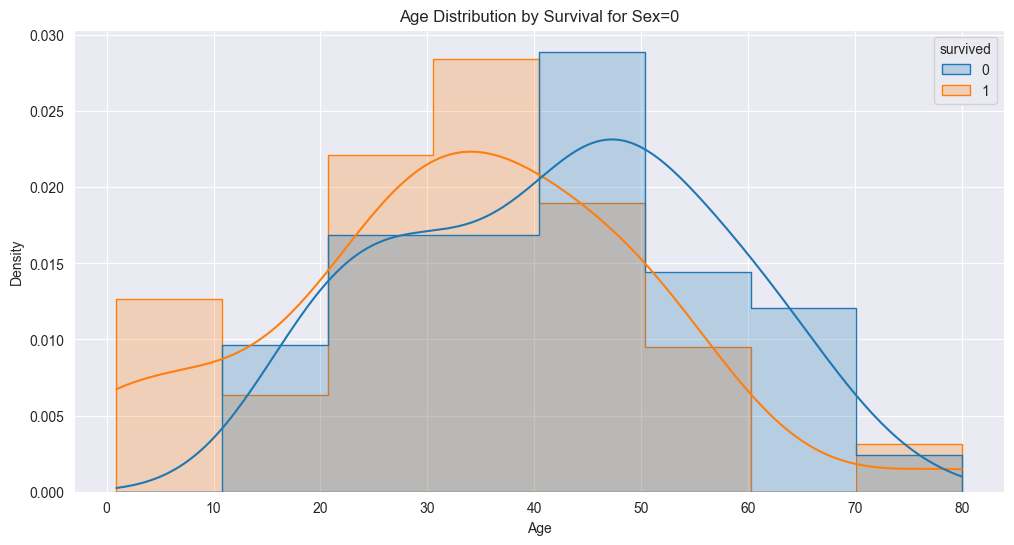

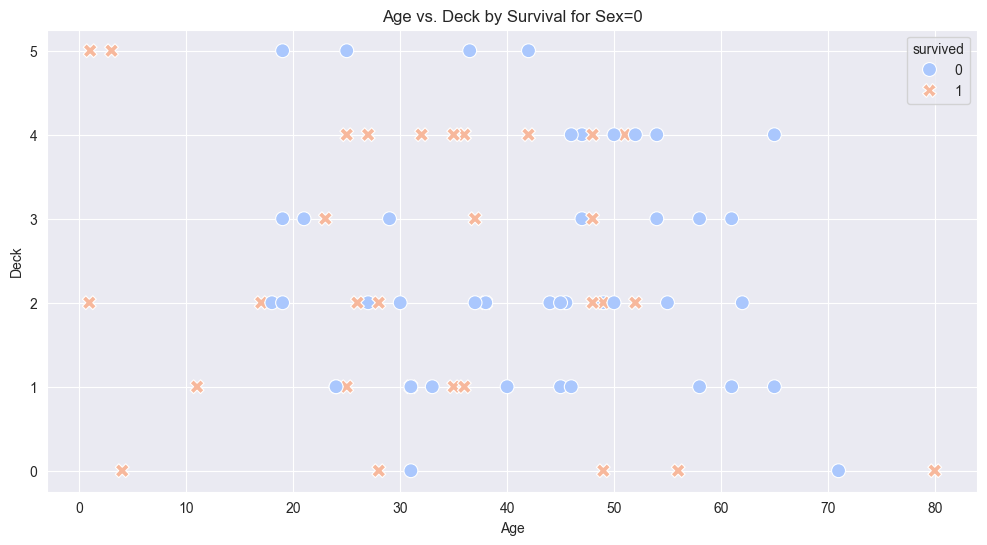

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for 'sex' equal to 0
train_df_sex_0 = train_df[train_df['sex'] == 0]

# Plotting age distribution by survival for 'sex' = 0
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df_sex_0, x='age', hue='survived', kde=True, element='step', stat='density', common_norm=False)
plt.title('Age Distribution by Survival for Sex=0')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# Plotting Age vs. Deck colored by Survival for 'sex' = 0
plt.figure(figsize=(12, 6))
sns.scatterplot(data=train_df_sex_0, x='age', y='deck', hue='survived', style='survived', palette='coolwarm', s=100)
plt.title('Age vs. Deck by Survival for Sex=0')
plt.xlabel('Age')
plt.ylabel('Deck')
plt.grid(True)
plt.show()

